In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Load the dataset
df = pd.read_csv("uber-raw-data-sep14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
# Check missing values
df.info()

# Convert date/time to datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Create new time-based columns
df['Day'] = df['Date/Time'].dt.day
df['Weekday'] = df['Date/Time'].dt.weekday
df['Hour'] = df['Date/Time'].dt.hour
df['Month'] = df['Date/Time'].dt.month_name()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


C:\Users\Tanishka\AppData\Local\Temp\ipykernel_9524\2343932752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


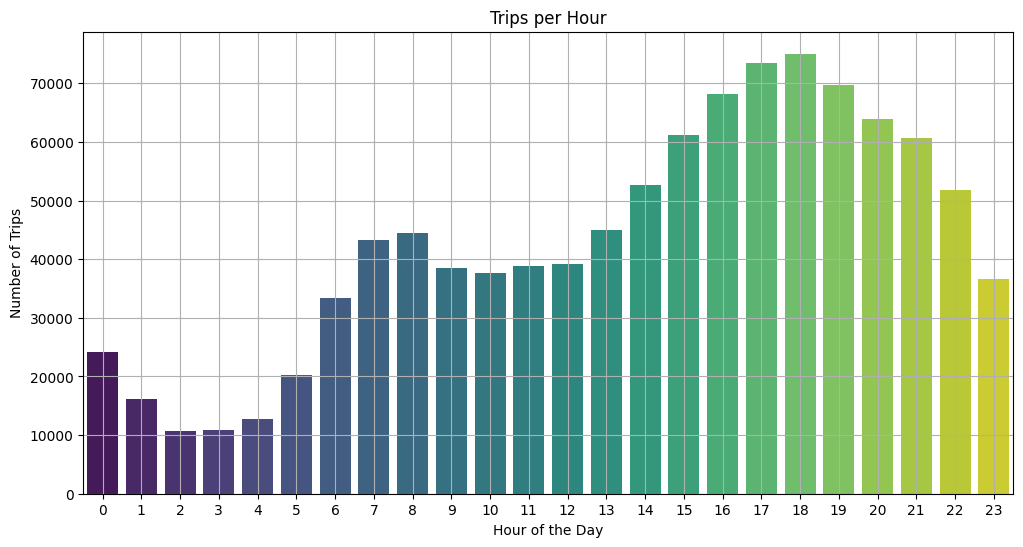

C:\Users\Tanishka\AppData\Local\Temp\ipykernel_9524\2343932752.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, palette='coolwarm')


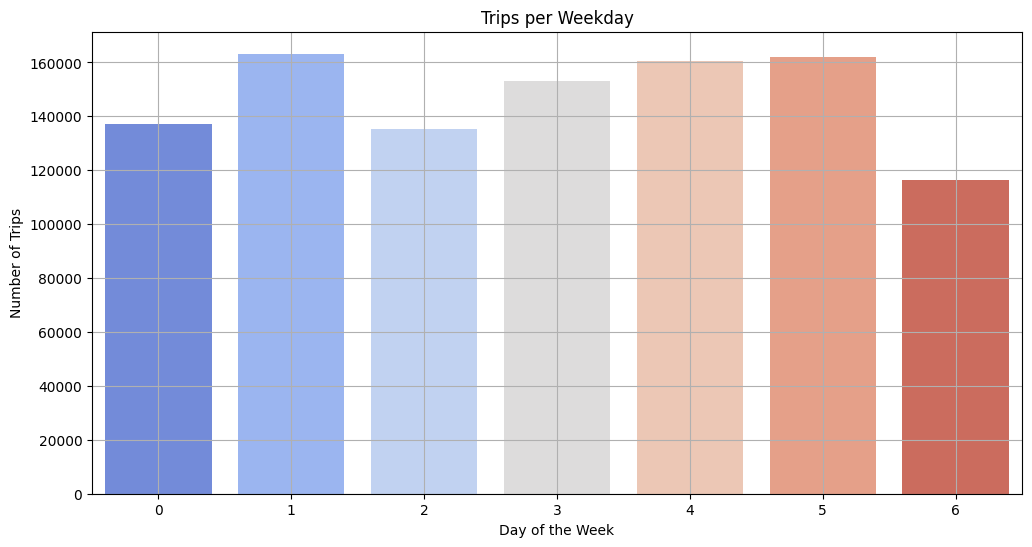

In [5]:
# Trip count per hour
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

# Trips per weekday
plt.figure(figsize=(12,6))
sns.countplot(x='Weekday', data=df, palette='coolwarm')
plt.title('Trips per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


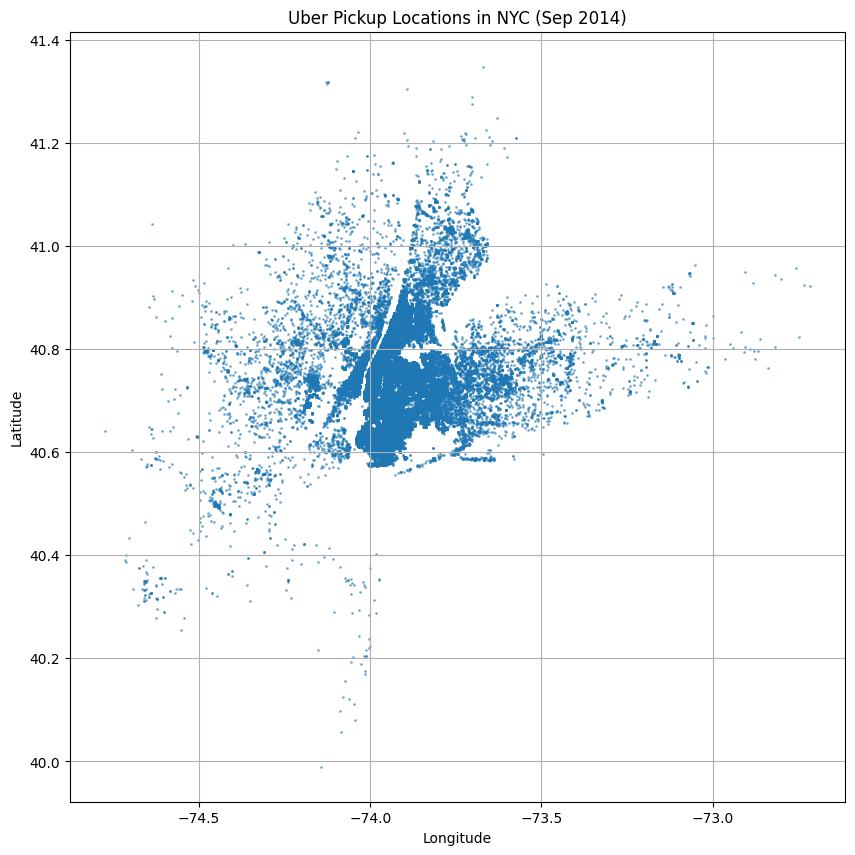

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df['Lon'], df['Lat'], s=1, alpha=0.5)
plt.title('Uber Pickup Locations in NYC (Sep 2014)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


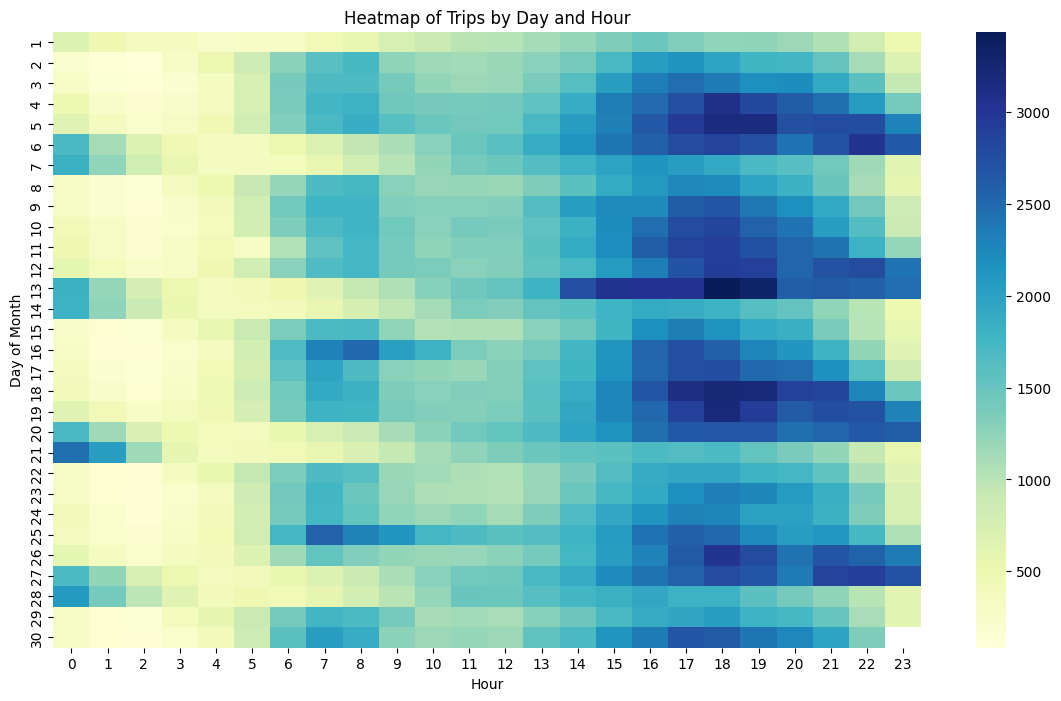

In [7]:
heatmap_data = df.groupby(['Day','Hour']).size().unstack()
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Heatmap of Trips by Day and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Month')
plt.show()
